#### Monocle2 

In [ ]:
install.packages("rmarkdown")
install.packages("knitr")
install.packages("languageserver")

In [2]:
library(monocle)
library(Seurat)
library(BiocManager)
library(ggplot2)
library(SeuratObject)

Loading required package: Matrix



Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: ggplot2

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines

Loading required

In [2]:
list.files()
getwd()

[1] "bin"                    "cmake"                  "conda-meta"            
 [4] "etc"                    "fonts"                  "include"               
 [7] "lib"                    "libexec"                "man"                   
[10] "monocle.ipynb"          "msc_251105.rds"         "sbin"                  
[13] "share"                  "ssl"                    "var"                   
[16] "x86_64-conda-linux-gnu"

[1] "/home/seoyoon/miniconda3/envs/monocle2"

In [ ]:
msc <- readRDS("/home/seoyoon/miniconda3/envs/monocle2/msc_251105.rds")

In [5]:
str(msc) # str 객체 구조 알기

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 0 slots
 Named list()
  .. .. .. ..$ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:35960895] 13 24 33 37 45 51 62 63 70 102 ...
  .. .. .. .. .. .. ..@ p       : int [1:11183] 0 2709 3842 4415 6587 9743 12177 13748 15071 17268 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 27998 11182
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:35960895] 1 1 1 2 3 1 24 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:35960895] 13 24 33 37 45 51 62 63 70 102 ...
  .. .. .. .. .. .. ..@ p       : int [1:11183] 0 2709 3

In [ ]:
DefaultAssay(msc)
print(Assays(msc))  

[1] "RNA"

character(0)


In [ ]:
msc@assays

$RNA
An object of class "Assay5"
<S4 Type Object>
attr(,"layers")
attr(,"layers")$counts
27998 x 11182 sparse Matrix of class "dgCMatrix"
                                                                                          
   [1,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   .   .  .  .   .   .  .   .  .
   [2,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   .   .  .  .   .   .  .   .  .
   [3,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   .   .  .  .   .   .  .   .  .
   [4,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   .   .  .  .   .   .  .   .  .
   [5,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   .   .  .  .   .   .  .   .  .
   [6,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   1   .  .  .   .   .  .   .  .
   [7,]  .  .  .  .   .   .  .   .   .  .  .  .  .  .  . .   .   .  .  .   .   .  .   .  .
   [8,]  .  .  .  .   1   .  .   .   .  .  .  1  .  1  . .   .   .  1  .   .   1  1   .  .
   [9,]  .  .  .  .   .   1  .   .   1  2  

In [ ]:
head(msc@assays$RNA@layers$counts) # 지금 msc가 annotation되어있지 않음.

6 x 11182 sparse Matrix of class "dgCMatrix"
                                                                              
[1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[6,] . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . .
                                                                              
[1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[5,] . 

In [48]:
install.packages("biomaRt")

Warning message:
“package ‘biomaRt’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(biomaRt)

# Ensembl mouse
mart <- useMart("ensembl", dataset = "mmusculus_gene_ensembl")

# 임의의 gene_id 리스트
gene_ids <- rownames(expr_matrix)

# 매핑
gene_map <- getBM(
  attributes = c("ensembl_gene_id", "mgi_symbol"),
  filters = "ensembl_gene_id",
  values = gene_ids,
  mart = mart
)

In [ ]:
expr_matrix <- msc@assays$RNA@layers$counts
head(rownames(expr_matrix))
length(rownames(expr_matrix))
rownames(expr_matrix) <- paste0("gene", seq_len(nrow(expr_matrix))) # 강제로 gene에 이름 생성

NULL

[1] 0

In [ ]:
# 1. msc가 일반 matrix (Seurat object)여서, CellDataSet으로 변환
# (이미 CellDataSet이면 이 단계는 생략)
pd <- new("AnnotatedDataFrame", data = msc@meta.data)  # phenotype data
gene_annotation <- data.frame(
  gene_short_name = rownames(expr_matrix),
  row.names = rownames(expr_matrix)
)
fd <- new("AnnotatedDataFrame", data = gene_annotation)  # feature data
msc_cds <- newCellDataSet(# CellDataSet
  expr_matrix,
  phenoData = pd,
  featureData = fd,
  lowerDetectionLimit = 1,
  expressionFamily = negbinomial.size()
)

In [ ]:
# 2. 크기 보정 및 정규화
msc_cds <- estimateSizeFactors(msc_cds)
msc_cds <- estimateDispersions(msc_cds)

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help
ℹ The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors.”
Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors.”
Warning message:
“glm.fit: algorithm did not converge”
Removing 82 outliers



In [ ]:
# 3. 고변이 유전자 선택
disp_table <- dispersionTable(msc_cds)
ordering_genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id
msc_cds <- setOrderingFilter(msc_cds, ordering_genes)

In [ ]:
# 4. 차원 축소 (DDRTree) 및 궤적 학습
msc_cds <- reduceDimension(msc_cds, method = "DDRTree")
msc_cds <- orderCells(msc_cds)

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection)

[1]  0.51022989  0.64661843  7.27328631  0.68832624  0.47644151  0.68428000
    [7]  0.34689322  8.61524121  1.13155583  0.55882589  1.18520574  0.91803515
   [13]  0.76029495  0.75206913  0.80271456  1.37962197  1.26397873  1.18661094
   [19]  0.69810585  0.33054053  0.70690486  0.88338961  0.43689845  0.57612071
   [25]  0.26726586  0.31959652  1.10569221  0.74408631  0.68178803  0.86031570
   [31]  0.93785914  0.83380465  0.92337440  0.43028505  1.30272524  0.18335595
   [37]  0.70968539  0.70701763  1.39734573  9.16816442  8.59272219  1.09104232
   [43]  0.77103394  8.64779218  0.48708243  1.13478628  4.30482368  2.39156764
   [49]  0.68074054  0.49711862  1.42823702  0.62469347  1.12798394  0.34242231
   [55]  0.93004732  1.21111705  0.61101160  0.74713316  0.96851939  9.06353653
   [61]  1.19514106  0.65811963  1.04361738  0.31957812  3.72453303  0.31160267
   [67]  7.06893688  1.18988056  9.18581677  0.40929688  7.93584536  1.19549315
   [73]  0.89162693  0.99943643  0.39703623  0.93088747  0.59192473  1.21117414
   [79]  1.00381272  0.83668361  0.29158792  0.51595683  1.24421276  1.38719195
   [85]  0.80514180  1.18643113  1.27162930  4.69905934  0.40752188  0.66856269
   [91]  1.01627625  1.15483333  0.84563277  0.72336437  0.61320900  0.83812791
   [97]  0.85665344  0.96565502  1.13967182  0.38943647  0.67732310  1.25016734
  [103]  2.19203422  1.38292154  1.04247574  0.88988983  0.84301998  1.09557486
  [109]  0.80119752  0.89963784  4.89856980  0.48131652  1.25022156  0.75472444
  [115]  1.33791448  0.39221212  0.84424795  0.36812853  0.41953486  9.15848176
  [121]  0.37368850  9.06131433  1.20267658  1.36952359  1.19833226  9.25866236
  [127]  0.58071678  0.95036193  1.08413584  1.33968782  0.78539426  0.80483400
  [133]  0.90363106  0.77727818  0.39903559  1.36614005  1.31953885  0.71395786
  [139]  0.58270071  1.06843252  1.30067317  0.14797464  0.53983409  1.33287963
  [145]  0.98033772  0.95926288  0.38117301  0.91085975  1.14212728  1.04851237
  [151]  0.20324819  0.56804861  0.61829183  1.02354640  1.08203194  0.54316206
  [157]  0.52238129  0.54081290  7.42993743  1.62672040  0.84583334  0.34881595
  [163]  1.10563236  0.79338974  1.08533418  1.10531489  1.03249144  0.90382930
  [169]  0.58360419  8.67721378  0.83269165  0.58121877  0.78690697  1.15293452
  [175]  2.95945050  0.92101688  7.17034579  1.38527216  8.02826911  0.29126818
  [181]  0.99882961  1.33350386  6.60620568  1.02739029  1.36070106  1.12317574
  [187]  0.77522322  0.40282590  0.46519911  4.50876427  0.32830103  8.25396336
  [193]  1.33496909  0.86312705  1.08051996  0.40042978  0.88327623  1.19637600
  [199]  0.63305276  0.52839489  0.95514363  1.19598853  0.88571834  1.41722597
  [205]  0.58021587  1.42707303  0.67069364 17.10103839  1.33717609  0.24847294
  [211]  0.42905868  0.94862188  0.62993231  1.41494915  1.33002767  1.32689712
  [217]  1.01959189  0.72173696  0.74745251  0.65246576  1.40788085  2.57438106
  [223]  0.61519285  0.78188774  0.69415566  0.97924632  0.70917628  0.61014528
  [229]  0.50530541  0.63408040  3.92385571  0.50807443  0.60820830  0.64315607
  [235]  8.40581099  1.20912522  0.80883212  0.92347098  1.15327820  1.17052848
  [241]  0.72695487  8.63509265  1.11555905  0.74146174  0.31094853  0.69398727
  [247]  1.15484750  0.65286958  0.91169616  0.61418208  1.09144902  1.10517949
  [253]  1.22792012  8.79625983  5.09975037  4.11235886  0.64074344  0.67892060
  [259]  8.62028072  0.52292825  0.70215785  0.33127444  0.93419140  1.22545768
  [265]  0.22387612  1.01695943  1.11066996  0.92627419  0.83681092  0.91720006
  [271]  0.18005802  0.74153858  3.92806615  0.68272633  0.83470264  0.63124218
  [277]  1.12970281  0.72970605  0.52120927  0.36154977  0.48222916  7.17456535
  [283]  1.04072102  1.39782234  0.69712425  0.94244044  1.02255936  1.05675009
  [289]  0.80764132  1.07063297  1.37029088  0.70697878  0.81168622  8.26545764
  [295]  0.92577065  9.04460796  9.23451049  0.33958677  0.89837281  1.50147980
  [3

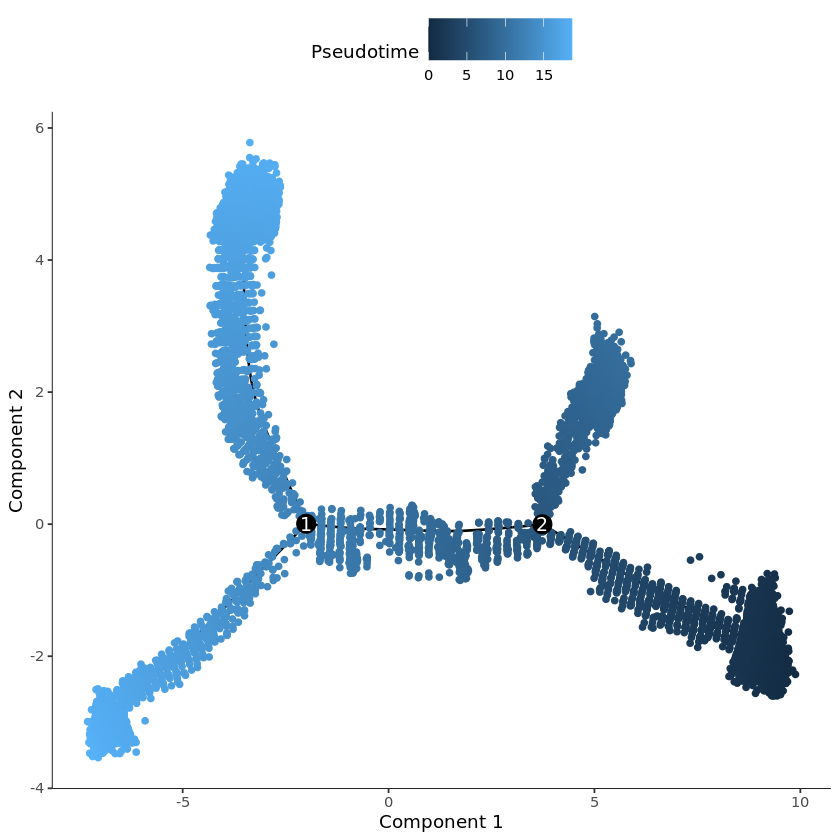

In [ ]:

# 5. 궤적 시각화
plot_cell_trajectory(msc_cds, color_by = "Pseudotime")   # 또는 color_by = "Pseudotime"
pData(msc_cds)$Pseudotime